# Mars 2020 Mission - Perseverence Landing
## YouTube Live Comments Analysis

You can find the full live video [here!](https://www.youtube.com/watch?v=gm0b_ijaYMQ)

The goal of this notebook is to understand what people were talking during the ["7 minutes of terror"](https://www.youtube.com/watch?v=rzmd7RouGrM) (you can see the actual footage [here](https://www.youtube.com/watch?v=4czjS9h4Fpg)!) and the comments about the [first image](https://mars.nasa.gov/mars2020/multimedia/raw-images/FLR_0000_0666952977_663ECM_T0010044AUT_04096_00_2I3J01#.YD2CrMuBnis.link)! 

- [Loading the Data](#loading-the-data)
- [Analysis](#analysis)   
    - [The 7 Minutes of Terror](#7-minutes)
        - [Parachute Deploy](#parachute-deploy)
        - [Terrain Relative Navigation Valid Solution for Landing Spot](#terrain-relative-navigation)
        - [Back Shell Separation](#back-shell-separation)
        - [Sky Crane Maneuver](#sky-crane-maneuver)
        - [Touchdown Confirmed](#touchdown-confirmed)
    - [First Image Comments](#first-image)
    - [Full Live Stream Analysis](#full-analysis)
        - [Ngrams](#ngrams)
        - [Special Word Cloud](#word-cloud)
        
    

<a id="loading-the-data"></a>
# Loading the Data


In [ ]:
import requests
import shutil

image_url = "https://imgur.com/sq800iH.png"
filename = image_url.split("/")[-1]


r = requests.get(image_url, stream = True)


if r.status_code == 200:
    r.raw.decode_content = True
    with open(filename,'wb') as f:
        shutil.copyfileobj(r.raw, f)
else:
    print('Image Couldn\'t be retreived')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords,wordnet
from nltk.tokenize import WordPunctTokenizer
from string import punctuation
from nltk.stem import WordNetLemmatizer
from nltk import ngrams, FreqDist
from PIL import Image
import seaborn as sns
import numpy as np
from wordcloud import WordCloud, ImageColorGenerator

sns.set_context(rc={"font.size":15,"axes.titlesize":20,"axes.labelsize":20})
sns.color_palette("YlOrBr", as_cmap=True)

In [ ]:
data = pd.read_csv('../input/perseverance-land-on-mars-youtube-live-comments/Perseverance_Landing.csv')

In [ ]:
data.head()

data.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
data.head()

In [ ]:
data.isna().sum()

<a id="analysis"></a>
# Analysis

Tokenize and Lemmatize words using NLTK package.

In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()

stop = stopwords.words('english')

for punct in punctuation:
    stop.append(punct)
    
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

def filter_text(text, stop_words):
    word_tokens = WordPunctTokenizer().tokenize(text)
    filtered_text = [w for w in word_tokens if w.isalpha()]
    filtered_text = [wordnet_lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in filtered_text if not w in stop_words] 
    return " ".join(filtered_text)

data["filtered_text"] = data.comment.apply(lambda x : filter_text(x, stop)) 

data.head()

In [ ]:
time_stamps = ['1:37:22 ','1:39:04 ','1:39:27 ','1:40:17 ','1:40:42 ','1:41:42 ']

In [ ]:
minutes_of_terror_data = []
for i in range(len(time_stamps)-1):
    index_start = data[data['time'] == time_stamps[i]].index[0]
    index_end = data[data['time'] == time_stamps[i+1]].index[-1]
    minutes_of_terror_data.append(data.iloc[index_start:index_end+1])

In [ ]:
index_start = data[data['time'] == '1:43:00 '].index[0]
index_end = data[data['time'] == '1:45:00 '].index[-1]
first_image_data = data.iloc[index_start:index_end+1]

In [ ]:
def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 21.0 / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)

def make_wordcloud(words,title):
    cloud = WordCloud(width=1920, height=1080,max_font_size=200, max_words=300, background_color="white", color_func=random_color_func).generate(words)
    plt.figure(figsize=(15,15))
    plt.imshow(cloud, interpolation="bilinear")
    plt.axis("off") 
    plt.title(title, fontsize=20)
    plt.show()

<a id="7-minutes"></a>
## The 7 Minutes of Terror

<a id="parachute-deploy"></a>
### Parachute Deploy
1:37:22
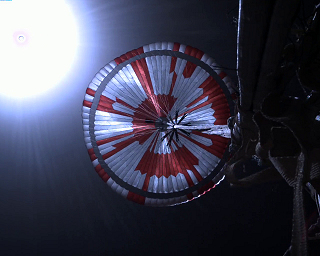

In [ ]:
make_wordcloud(" ".join(minutes_of_terror_data[0].filtered_text),'Parachute Deploy')

<a id="terrain-relative-navigation"></a>
### Terrain Relative Navigation Valid Solution for Landing Spot
1:39:04

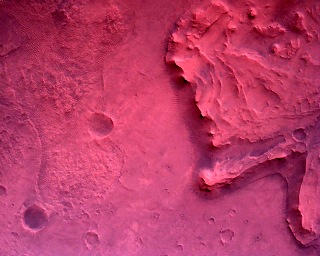

In [ ]:
make_wordcloud(" ".join(minutes_of_terror_data[1].filtered_text), 'Terrain Relative Navigation Valid Solution for Landing Spot')

<a id="back-shell-separation"></a>
### Back Shell Separation
1:39:27

In [ ]:
make_wordcloud(" ".join(minutes_of_terror_data[2].filtered_text), 'Back Shell Separation')

<a id="sky-crane-maneuver"></a>
### Sky Crane Maneuver
1:40:17

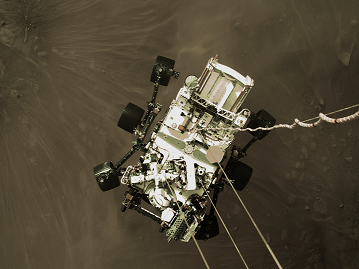

In [ ]:
make_wordcloud(" ".join(minutes_of_terror_data[3].filtered_text), 'Sky Crane Maneuver')

<a id="touchdown-confirmed"></a>
### Touchdown Confirmed
1:40:42

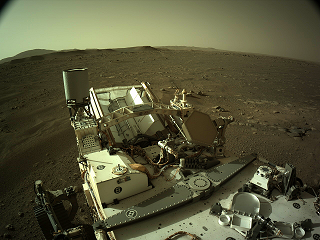

In [ ]:
make_wordcloud(" ".join(minutes_of_terror_data[4].filtered_text), 'Touchdown Confirmed')

<a id="first-image"></a>
## First Image Comments
1:43:00

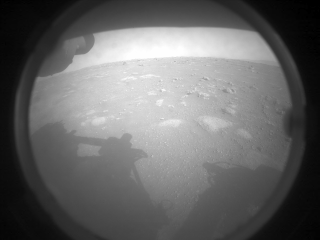

In [ ]:
make_wordcloud(" ".join(first_image_data.filtered_text), 'First Image Comments')

<a id="full-analysis"></a>
## Full Live Stream Analysis

Let's see what people were talking during the live stream, using Ngrams and WordCloud!

<a id="ngrams"></a>
### Ngrams


In [ ]:
all_text = " ".join(data.filtered_text) 
words = nltk.tokenize.word_tokenize(all_text)

In [ ]:
ngrams_data = dict()
for size in 2, 3, 4, 5:
    ngrams_data[size] = FreqDist(ngrams(words, size))

In [ ]:
ngrams_2 = pd.DataFrame(ngrams_data[2].most_common(15), columns=['words','count'])
ngrams_2['words'] = ngrams_2.words.apply(lambda a: ' '.join(a))

plt.figure(figsize=(10,10))
ax = sns.barplot(x='count',y='words',data=ngrams_2, orient='h', palette="YlOrBr")
ax.set_ylabel('')
ax = ax.set_title('2-Ngrams')

I was here and Mark Rober are the top messages! Mark Rober is a famous youtuber that worked at NASA a couple years ago, you can check his channel [here](https://www.youtube.com/c/MarkRober).

In [ ]:
ngrams_3 = pd.DataFrame(ngrams_data[3].most_common(15), columns=['words','count'])
ngrams_3['words'] = ngrams_3.words.apply(lambda a: ' '.join(a))

plt.figure(figsize=(10,10))
ax = sns.barplot(x='count',y='words',data=ngrams_3, orient='h', palette="YlOrBr")
ax.set_ylabel('')
ax = ax.set_title('3-Ngrams')

Very positive messages, like 'Good luck Nasa', 'Good luck Perseverence' etc...

In [ ]:
ngrams_4 = pd.DataFrame(ngrams_data[4].most_common(15), columns=['words','count'])
ngrams_4['words'] = ngrams_4.words.apply(lambda a: ' '.join(a))

plt.figure(figsize=(10,10))
ax = sns.barplot(x='count',y='words',data=ngrams_4, orient='h', palette="YlOrBr")
ax.set_ylabel('')
ax = ax.set_title('4-Ngrams')

We have some spamming, but some interesting phrases like 'Let's Rick Roll Nasa'.

In [ ]:
ngrams_5 = pd.DataFrame(ngrams_data[5].most_common(15), columns=['words','count'])
ngrams_5['words'] = ngrams_5.words.apply(lambda a: ' '.join(a))

plt.figure(figsize=(10,10))
ax = sns.barplot(x='count',y='words',data=ngrams_5, orient='h', palette="YlOrBr")
ax.set_ylabel('')
ax = ax.set_title('5-Ngrams')

Clearly a 5 ngram is just spammig at this point!

<a id="word-cloud"></a>
### Word Cloud

In [ ]:
mask = np.array(Image.open('./sq800iH.png'))

wc = WordCloud(mask=mask,width=1920, height=1080,
               max_font_size=100, max_words=3000,background_color="white",contour_width=0.1)

wc.generate(all_text)

image_colors = ImageColorGenerator(mask)

plt.figure(figsize=(20,20))
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
wc.to_file('word.png')

Thanks for reading through the end! Hope you liked it!